In [1]:
import json
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
def lire_fichier (chemin):
    with open(chemin) as json_data: 
        texte =json.load(json_data)
    return texte

# Graphique  pour les distances sur chaque textes

ValueError: Invalid `kind`: 'swarn'. Options are 'strip', 'swarm', 'box', 'boxen', 'violin', 'bar', 'count', and 'point'.

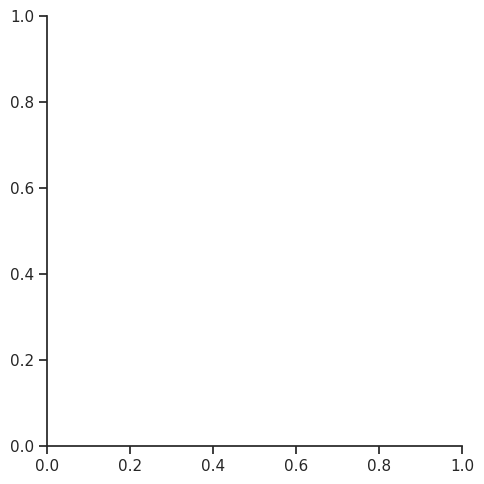

In [11]:
tableau={}
liste_version_spacy=[]
liste_config=[]
liste_dist=[]
liste_auteur=[]
liste_name_metric=[]
liste_version_ren=[]

## Ajouter : a représenter spacy 3.7, 3.5.1 et 2.3.5 sur les mêmes graphiques, b 1 graph distance cosinus et 1 graph distance jaccard.

calcul=["sim2-3","word"]
calc=calcul[0]
spacy_mod=["lg","sm","md"]
spc_mod=spacy_mod[0]
x=0.9
path_data =f"../DATA_ELTeC-fra_Distances/*/*/*OCR/*/NER/SIM/{calc}*.json"

for path in glob.glob(path_data):
    # print(path)
    if spc_mod in path:
        # autor=path.split("/")[4]
        # autor=autor.split("_")[0]
        # print(autor)
        # version=path.split("/")[5]
        # version=version.split("_")[-1]
        # print(version)
        vers_ren=path.split("_")[-1].split("-liste.json")[0]
        print("vers_ren",vers_ren)
    #     
        distance=lire_fichier(path)
        # print(distance)

        if version=="Kraken-base.txt" or version=="kraken" or version=="Kraken" :
            version=re.sub("Kraken-base.txt|kraken|Kraken",f"Kraken -- {vers_ren}",version)
            print("Version : ", version)

        if version=="kraken-jspll-pretrain.txt" or version=="kraken-jspll-pretrain":
            version=re.sub("kraken-jspll-pretrain.txt|kraken-jspll-pretrain","Kraken--jspl-fr",version)
            print("Version : ", version)
        if version=="Kraken-jspll-pretrain":
            version=re.sub("Kraken-jspll-pretrain","Kraken--jspl-en",version)
            print("Version : ", version)

        if version=="kraken-jspll-ELTeC.txt" or version=="kraken-jspll-ELTeC" :
            version=re.sub("kraken-jspll-ELTeC.txt|kraken-jspll-ELTeC","Kraken--jspl-ELTeCfr",version)
            print("Version : ", version)
        if  version=="Kraken-jspll-ELTeC":
            version=re.sub("Kraken-jspll-ELTeC","Kraken--jspl-ELTeCen",version)
            print("Version : ", version)
        if  version=="Kraken-jspl-ELTeC":
            version=re.sub("Kraken-jspl-ELTeC","Kraken--jspl-ELTeCpt",version)
            print("Version : ", version)

        if version=="TesseractFra-PNG.txt" or version=="TesseractFra-PNG" or version=="TesseractFra-png":
            version=re.sub("TesseractFra-PNG.txt|TesseractFra-PNG|TesseractFra-png",f"Tess. fr -- _{vers_ren}",version)
            print("Version : ", version)

        if version=="tesseract" or version=="Tesseract-PNG":
             version=re.sub("tesseract|Tesseract-PNG","Tess.",version)
             print("Version : ", version)
        if version=="TesseractPor-PNG":
            version=re.sub("TesseractPor-PNG","Tess. pt",version)
            print("Version : ", version)

        if version=="TesseractFra-PNG-jspll-pretrain.txt" or version=="TesseractFra-PNG-jspll-pretrain":
            version=re.sub("TesseractFra-PNG-jspll-pretrain.txt|TesseractFra-PNG-jspll-pretrain","Tess. fr -- jspl-fr",version)
            print("Version : ", version)
        if  version=="tesseract-jspll-pretrain" or version =="Tesseract-PNG-jspll-pretrain" :
            version=re.sub("tesseract-jspll-pretrain|Tesseract-PNG-jspll-pretrain","Tess. -- jspl-en",version)
            print("Version : ", version)

        if version=="TesseractFra-PNG-jspll-ELTeC.txt" or version=="TesseractFra-PNG-jspll-ELTeC":
            version=re.sub("TesseractFra-PNG-jspll-ELTeC.txt|TesseractFra-PNG-jspll-ELTeC","Tess. fr -- jspl-ELTeCfr",version)
            print("Version : ", version)
        if  version=="Tesseract-PNG-jspll-ELTeC":
            version=re.sub("Tesseract-PNG-jspll-ELTeC","Tess. -- jspl-ELTeCen",version)
            print("Version : ", version)
        if version =="TesseractPor-PNG-jspl-ELTeC":
            version=re.sub("TesseractPor-PNG-jspl-ELTeC","Tess. pt -- jspl-ELTeCpt",version)
            print("Version : ", version)

        if version == "tesseract0.3.10":
            version = re.sub("tesseract0.3.10", "Tess. fr 3.10", version)
            print("version : ", version)

        if version == "kraken4.3.13.dev25":
            version = re.sub("kraken4.3.13.dev25", "Kraken 4.3.13", version)
            print("version : ", version)

        if version == "lectaurep-kraken4.3.13.dev25":
            version = re.sub("lectaurep-kraken4.3.13.dev25", "Kraken Lectp. 4.3.13", version)
            print("version : ", version)

        # liste_distance=[]
        for key, res_dist in distance.items():
            # print("Key : ",key)
            # if key == "cosinus":
            if key == "jaccard" or key == "cosinus":
                for r in res_dist:
                    liste_name_metric.append(key)
                    liste_config.append(version)#+"--"+paire)
                    liste_auteur.append(autor)
                    liste_dist.append(r)
                    liste_version_ren.append(vers_ren)


tableau["Auteur"]=liste_auteur
tableau["Configuration"]=liste_config
tableau["Distance"]=liste_dist
tableau["Metric"]=liste_name_metric
tableau["REN"]=liste_version_ren
data_tab = pd.DataFrame(tableau)
data_tab=data_tab.sort_values(by = 'Configuration')
# display(data_tab)


sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
auteur_liste=set(tableau["Auteur"])
for i in auteur_liste:
    print(i)
    data_tab1=data_tab.query('Auteur == @i ')
    display(data_tab1)
# Load the example planets dataset
# planets = sns.load_dataset("planets")

sns.catplot(data=data_tab, x="Distance", y="Configuration", hue="Metric", kind="swarn")

# f, ax = plt.subplots(figsize=(7, 6))
# ax.set_xscale("linear")
# Tweak the visual presentation
plt.tick_params(axis = 'both', labelsize = 25)
ax.xaxis.grid(True)
ax.set(ylabel="")
plt.xlim([0,x])
#
#
#
# sns.despine(trim=True, left=True)
# plt.savefig(f"../Boite-a_moustache/{version_doc}_{calc}.png",dpi=300, bbox_inches="tight")##Texte
plt.savefig(f"../Distances_points/ARCHEO-spaCy_ELTeC-fra_Distances_spaCy-{spc_mod}_{calc}-point.png",dpi=300, bbox_inches="tight")##NER

# Graphique boite à moustache pour les distances sur tous le corpus

spacy-lg-3.5.1
Version :  Tess. fr -- spacy-lg-3.5.1
spacy-lg-3.5.1
Version :  Kraken -- spacy-lg-3.5.1
spacy-lg-3.5.1
Version :  Tess. fr -- spacy-lg-3.5.1
spacy-lg-3.5.1
Version :  Kraken -- spacy-lg-3.5.1
spacy-lg-3.5.1
Version :  Tess. fr -- spacy-lg-3.5.1
spacy-lg-3.5.1
Version :  Kraken -- spacy-lg-3.5.1
spacy-lg-3.5.1
Version :  Tess. fr -- spacy-lg-3.5.1
spacy-lg-3.5.1
Version :  Kraken -- spacy-lg-3.5.1
spacy-lg-3.5.1
Version :  Tess. fr -- spacy-lg-3.5.1
spacy-lg-3.5.1
Version :  Kraken -- spacy-lg-3.5.1
spacy-lg-3.5.1
Version :  Tess. fr -- spacy-lg-3.5.1
spacy-lg-3.5.1
Version :  Kraken -- spacy-lg-3.5.1
spacy-lg-3.5.1
Version :  Tess. fr -- spacy-lg-3.5.1
spacy-lg-3.5.1
Version :  Kraken -- spacy-lg-3.5.1
spacy-lg-3.5.1
Version :  Tess. fr -- spacy-lg-3.5.1
spacy-lg-3.5.1
Version :  Kraken -- spacy-lg-3.5.1
spacy-lg-3.5.1
Version :  Tess. fr -- spacy-lg-3.5.1
spacy-lg-3.5.1
Version :  Kraken -- spacy-lg-3.5.1
spacy-lg-3.5.1
Version :  Tess. fr -- spacy-lg-3.5.1
spacy-lg-3.

,Auteur,Configuration,Distance,Metric,REN
65,NOAILLES,Kraken -- spacy-lg-2.3.5,0.356376,cosinus,spacy-lg-2.3.5
45,ADAM,Kraken -- spacy-lg-2.3.5,0.270168,cosinus,spacy-lg-2.3.5
63,MAUPASSANT,Kraken -- spacy-lg-2.3.5,0.192865,cosinus,spacy-lg-2.3.5
47,AIMARD-RIVIERE,Kraken -- spacy-lg-2.3.5,0.465505,cosinus,spacy-lg-2.3.5
49,AIMARD-TRAPPEURS,Kraken -- spacy-lg-2.3.5,0.169608,cosinus,spacy-lg-2.3.5
...,...,...,...,...,...
34,OCR,Tess. fr -- spacy-lg-3.7.5,0.176338,cosinus,spacy-lg-3.7.5
36,OCR,Tess. fr -- spacy-lg-3.7.5,0.005171,cosinus,spacy-lg-3.7.5
38,OCR,Tess. fr -- spacy-lg-3.7.5,0.022862,cosinus,spacy-lg-3.7.5
42,OCR,Tess. fr -- spacy-lg-3.7.5,0.085455,cosinus,spacy-lg-3.7.5


/tmp/ipykernel_9976/122465849.py:129: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Distance",  y="Configuration", data=data_tab,
/tmp/ipykernel_9976/122465849.py:135: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="Distance", y="Configuration", data=data_tab,


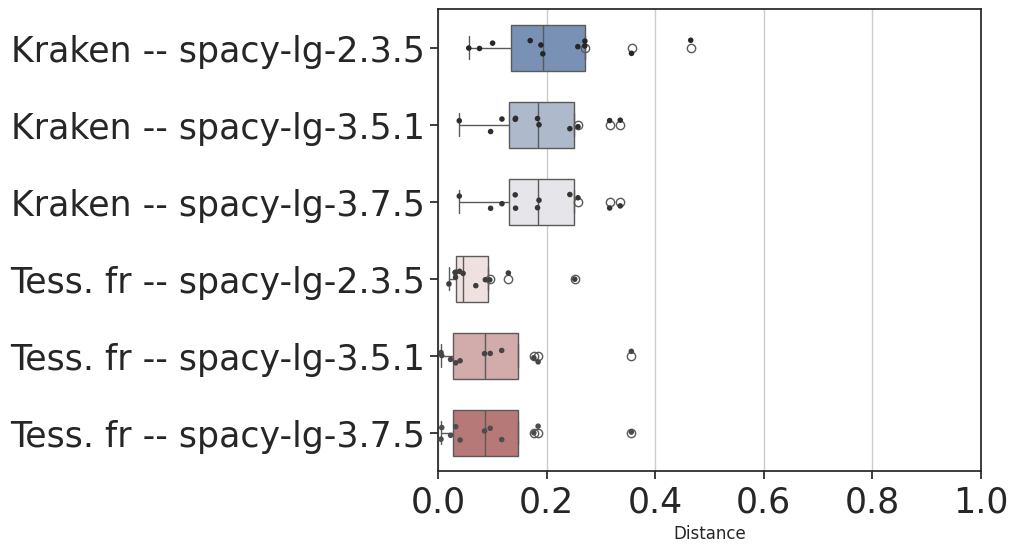

In [33]:
tableau={}
liste_version_spacy=[]
liste_config=[]
liste_dist=[]
liste_auteur=[]
liste_name_metric=[]
liste_version_ren=[]

## Ajouter : a représenter spacy 3.7, 3.5.1 et 2.3.5 sur les mêmes graphiques, b 1 graph distance cosinus et 1 graph distance jaccard.

calcul=["sim2-3","word"]
calc=calcul[0]
spacy_mod=["-lg","-sm","-md"]
spc_mod=spacy_mod[0]
x=1
path_data =f"../small-ELTeC-fra_Distances/*/*/*OCR/*/NER/SIM/{calc}*.json"

for path in glob.glob(path_data):
    # print(path)
    if spc_mod in path:
        autor=path.split("/")[4]
        autor=autor.split("_")[0]
        # print(autor)
        version=path.split("/")[5]
        version=version.split("_")[-1]
        # print(version)
        vers_ren=path.split("_")[-1].split("-liste.json")[0]
        print(vers_ren)

        distance=lire_fichier(path)
        # print(distance)

        if version=="Kraken-base.txt" or version=="kraken" or version=="Kraken" :
            version=re.sub("Kraken-base.txt|kraken|Kraken",f"Kraken -- {vers_ren}",version)
            print("Version : ", version)

        if version=="kraken-jspll-pretrain.txt" or version=="kraken-jspll-pretrain":
            version=re.sub("kraken-jspll-pretrain.txt|kraken-jspll-pretrain","Kraken--jspl-fr",version)
            print("Version : ", version)
        if version=="Kraken-jspll-pretrain":
            version=re.sub("Kraken-jspll-pretrain","Kraken--jspl-en",version)
            print("Version : ", version)

        if version=="kraken-jspll-ELTeC.txt" or version=="kraken-jspll-ELTeC" :
            version=re.sub("kraken-jspll-ELTeC.txt|kraken-jspll-ELTeC","Kraken--jspl-ELTeCfr",version)
            print("Version : ", version)
        if  version=="Kraken-jspll-ELTeC":
            version=re.sub("Kraken-jspll-ELTeC","Kraken--jspl-ELTeCen",version)
            print("Version : ", version)
        if  version=="Kraken-jspl-ELTeC":
            version=re.sub("Kraken-jspl-ELTeC","Kraken--jspl-ELTeCpt",version)
            print("Version : ", version)

        if version=="TesseractFra-PNG.txt" or version=="TesseractFra-PNG" or version=="TesseractFra-png":
            version=re.sub("TesseractFra-PNG.txt|TesseractFra-PNG|TesseractFra-png",f"Tess. fr -- {vers_ren}",version)
            print("Version : ", version)

        if version=="tesseract" or version=="Tesseract-PNG":
             version=re.sub("tesseract|Tesseract-PNG","Tess.",version)
             print("Version : ", version)
        if version=="TesseractPor-PNG":
            version=re.sub("TesseractPor-PNG","Tess. pt",version)
            print("Version : ", version)

        if version=="TesseractFra-PNG-jspll-pretrain.txt" or version=="TesseractFra-PNG-jspll-pretrain":
            version=re.sub("TesseractFra-PNG-jspll-pretrain.txt|TesseractFra-PNG-jspll-pretrain","Tess. fr -- jspl-fr",version)
            print("Version : ", version)
        if  version=="tesseract-jspll-pretrain" or version =="Tesseract-PNG-jspll-pretrain" :
            version=re.sub("tesseract-jspll-pretrain|Tesseract-PNG-jspll-pretrain","Tess. -- jspl-en",version)
            print("Version : ", version)

        if version=="TesseractFra-PNG-jspll-ELTeC.txt" or version=="TesseractFra-PNG-jspll-ELTeC":
            version=re.sub("TesseractFra-PNG-jspll-ELTeC.txt|TesseractFra-PNG-jspll-ELTeC","Tess. fr -- jspl-ELTeCfr",version)
            print("Version : ", version)
        if  version=="Tesseract-PNG-jspll-ELTeC":
            version=re.sub("Tesseract-PNG-jspll-ELTeC","Tess. -- jspl-ELTeCen",version)
            print("Version : ", version)
        if version =="TesseractPor-PNG-jspl-ELTeC":
            version=re.sub("TesseractPor-PNG-jspl-ELTeC","Tess. pt -- jspl-ELTeCpt",version)
            print("Version : ", version)

        if version == "tesseract0.3.10":
            version = re.sub("tesseract0.3.10", "Tess. fr 3.10", version)
            print("version : ", version)

        if version == "kraken4.3.13.dev25":
            version = re.sub("kraken4.3.13.dev25", "Kraken 4.3.13", version)
            print("version : ", version)

        if version == "lectaurep-kraken4.3.13.dev25":
            version = re.sub("lectaurep-kraken4.3.13.dev25", "Kraken Lectp. 4.3.13", version)
            print("version : ", version)

        # liste_distance=[]
        for key, res_dist in distance.items():
            # print("Key : ",key)
            if key == "cosinus":
            # if key == "jaccard":
                for r in res_dist:
                    liste_name_metric.append(key)
                    liste_config.append(version)#+"--"+paire)
                    liste_auteur.append(autor)
                    liste_dist.append(r)
                    liste_version_ren.append(vers_ren)


tableau["Auteur"]=liste_auteur
tableau["Configuration"]=liste_config
tableau["Distance"]=liste_dist
tableau["Metric"]=liste_name_metric
tableau["REN"]=liste_version_ren
data_tab = pd.DataFrame(tableau)
data_tab=data_tab.sort_values(by = 'Configuration')
display(data_tab)


sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("linear")

# Load the example planets dataset
# planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
# sns.boxplot(x=data_tab.Distance[(data_tab.Metric=="cosinus") & (data_tab.Configuration=="kraken--lg--lg")],  y=data_tab.Configuration[data_tab.Configuration=="kraken--lg--lg"], data=data_tab,
#             whis=[0, 100], width=.6, palette="vlag")
sns.boxplot(x="Distance",  y="Configuration", data=data_tab,
        whis=[0, 1], width=.6, palette="vlag")#, legend=False)

# Add in points to show each observation
# sns.stripplot(x=data_tab.Distance[(data_tab.Metric=="cosinus") & (data_tab.Configuration=="kraken--lg--lg")], y=data_tab.Configuration[data_tab.Configuration=="kraken--lg--lg"], data=data_tab,
#               size=4, color=".3", linewidth=0)
sns.stripplot(x="Distance", y="Configuration", data=data_tab,
          size=4, palette='dark:.3', linewidth=0)#, legend=False)

# Tweak the visual presentation
plt.tick_params(axis = 'both', labelsize = 25)
ax.xaxis.grid(True)
ax.set(ylabel="")
plt.xlim([0,x])

#
#
# sns.despine(trim=True, left=True)
# plt.savefig(f"../Boite-a_moustache/{version_doc}_{calc}.png",dpi=300, bbox_inches="tight")##Texte
plt.savefig(f"../Boite-a_moustache/ARCHEO-spaCy_ELTeC-fra_Distances_spaCy{spc_mod}_cosinus-{calc}.png",dpi=300, bbox_inches="tight")##NER

In [63]:
# !python --version

## Graphique distances cosinus 

In [ ]:
tableau={}
liste_version_spacy=[]
liste_config=[]
liste_dist=[]
liste_auteur=[]
liste_name_metric=[]
liste_version_ren=[]

## Ajouter : a représenter spacy 3.7, 3.5.1 et 2.3.5 sur les mêmes graphiques, b 1 graph distance cosinus et 1 graph distance jaccard.

lt_version_doc=["DATA_ELTeC-fra_EVAL-1", "DATA_ELTeC-fra_EVAL-corr-automatique", "ELTeC-fra_Complet_ENliste","DATA_ELTeC-fra_EVAL-corr-automatique-spaCy3.5.1","DATA_ELTeC-fra_EVAL-spaCy3.5.1","DATA_ELTeC-fra_spaCy-2.3.5","DATA_ELTeC-fra_EVAL_spaCy-2.3.5","DATA_ELTeC-fra_EVAL2"]
# lt_version_doc=["fra_spaCy3.5.1","eng_spaCy3.5.1","Por_spaCy3.5.1"]
version_doc=lt_version_doc[-1]
calcul=["sim2-3","word"]
calc=calcul[0]
x=1

# path_data = f"../{version_doc}_Distances/*/*OCR/*/SIM/{calc}*.json"## Text
path_data = f"../{version_doc}_Distances/*/*OCR/*/NER/SIM/{calc}*.json"## NER

for path in glob.glob(path_data):
    print(path)
    autor=path.split("/")[4]
    autor=autor.split("_")[0]
    # print(autor)
    version=path.split("/")[4]
    version=version.split("_")[-1]
    # print(version)
    vers_ren=path.split("_")[-1].split("-liste.json")[0]
    print("vers_ren",vers_ren)
    
    distance=lire_fichier(path)
    print(distance)

    if version=="Kraken-base.txt" or version=="kraken" or version=="Kraken" :
        version=re.sub("Kraken-base.txt|kraken|Kraken","Kraken",version)
        print("Version : ", version)

    if version=="kraken-jspll-pretrain.txt" or version=="kraken-jspll-pretrain":
        version=re.sub("kraken-jspll-pretrain.txt|kraken-jspll-pretrain","Kraken--jspl-fr",version)
        print("Version : ", version)
    if version=="Kraken-jspll-pretrain":
        version=re.sub("Kraken-jspll-pretrain","Kraken--jspl-en",version)
        print("Version : ", version)

    if version=="kraken-jspll-ELTeC.txt" or version=="kraken-jspll-ELTeC" :
        version=re.sub("kraken-jspll-ELTeC.txt|kraken-jspll-ELTeC","Kraken--jspl-ELTeCfr",version)
        print("Version : ", version)
    if  version=="Kraken-jspll-ELTeC":
        version=re.sub("Kraken-jspll-ELTeC","Kraken--jspl-ELTeCen",version)
        print("Version : ", version)
    if  version=="Kraken-jspl-ELTeC":
        version=re.sub("Kraken-jspl-ELTeC","Kraken--jspl-ELTeCpt",version)
        print("Version : ", version)

    if version=="TesseractFra-PNG.txt" or version=="TesseractFra-PNG" or version=="TesseractFra-png":
        version=re.sub("TesseractFra-PNG.txt|TesseractFra-PNG|TesseractFra-png","Tess. fr",version)
        print("Version : ", version)

    if version=="tesseract" or version=="Tesseract-PNG":
         version=re.sub("tesseract|Tesseract-PNG","Tess.",version)
         print("Version : ", version)
    if version=="TesseractPor-PNG":
        version=re.sub("TesseractPor-PNG","Tess. pt",version)
        print("Version : ", version)

    if version=="TesseractFra-PNG-jspll-pretrain.txt" or version=="TesseractFra-PNG-jspll-pretrain":
        version=re.sub("TesseractFra-PNG-jspll-pretrain.txt|TesseractFra-PNG-jspll-pretrain","Tess. fr -- jspl-fr",version)
        print("Version : ", version)
    if  version=="tesseract-jspll-pretrain" or version =="Tesseract-PNG-jspll-pretrain" :
        version=re.sub("tesseract-jspll-pretrain|Tesseract-PNG-jspll-pretrain","Tess. -- jspl-en",version)
        print("Version : ", version)

    if version=="TesseractFra-PNG-jspll-ELTeC.txt" or version=="TesseractFra-PNG-jspll-ELTeC":
        version=re.sub("TesseractFra-PNG-jspll-ELTeC.txt|TesseractFra-PNG-jspll-ELTeC","Tess. fr -- jspl-ELTeCfr",version)
        print("Version : ", version)
    if  version=="Tesseract-PNG-jspll-ELTeC":
        version=re.sub("Tesseract-PNG-jspll-ELTeC","Tess. -- jspl-ELTeCen",version)
        print("Version : ", version)
    if version =="TesseractPor-PNG-jspl-ELTeC":
        version=re.sub("TesseractPor-PNG-jspl-ELTeC","Tess. pt -- jspl-ELTeCpt",version)
        print("Version : ", version)

    if version == "tesseract0.3.10":
        version = re.sub("tesseract0.3.10", "Tess. fr 3.10", version)
        print("version : ", version)

    if version == "kraken4.3.13.dev25":
        version = re.sub("kraken4.3.13.dev25", "Kraken 4.3.13", version)
        print("version : ", version)

    if version == "lectaurep-kraken4.3.13.dev25":
        version = re.sub("lectaurep-kraken4.3.13.dev25", "Kraken Lectp. 4.3.13", version)
        print("version : ", version)

    liste_distance=[]
    for key, res_dist in distance.items():
        # print("Key : ",key)
        if key == "cosinus":
            for r in res_dist:
            #     if paire =="spaCy_lg" and name_metric=="cosinus":#or paire=="sm--sm" or paire=="md--md":
                liste_name_metric.append(key)
                liste_config.append(version)#+"--"+paire)
                liste_auteur.append(autor)
                liste_dist.append(r)
                liste_version_ren.append(vers_ren)
#
#         # if key=="KL_res":
#         #     for k, v in res_dist.items():
#         #         if k=="Cosine Dist.":
#         #             print(v)
#         #             liste_name_metric.append(k)
#         #             # liste_version.append(version)
#         #             liste_config.append(version)#+"--"+paire)
#         #             liste_auteur.append(autor)
#         #             # liste_version_spacy.append(version_spacy)
#         #             liste_dist.append(v)

tableau["Auteur"]=liste_auteur
tableau["Configuration"]=liste_config
tableau["Distance"]=liste_dist
tableau["Metric"]=liste_name_metric
tableau["REN"]=liste_version_ren
data_tab = pd.DataFrame(tableau)
data_tab=data_tab.sort_values(by = 'Configuration')
# display(data_tab)

version_ren_set=set(liste_version_ren)
# print(version_ren_set)
for i in version_ren_set:
    print(i)
    data_tab1=data_tab.query('REN == @i ')
    display(data_tab1)
    sns.set_theme(style="ticks")

    # Initialize the figure with a logarithmic x axis
    f, ax = plt.subplots(figsize=(7, 6))
    ax.set_xscale("linear")

    # Load the example planets dataset
    # planets = sns.load_dataset("planets")

    # Plot the orbital period with horizontal boxes
    # sns.boxplot(x=data_tab.Distance[(data_tab.Metric=="cosinus") & (data_tab.Configuration=="kraken--lg--lg")],  y=data_tab.Configuration[data_tab.Configuration=="kraken--lg--lg"], data=data_tab,
    #             whis=[0, 100], width=.6, palette="vlag")
    sns.boxplot(x="Distance",  y="Configuration", data=data_tab1,
                whis=[0, 1], width=.6, palette="vlag")#, legend=False)

    # Add in points to show each observation
    # sns.stripplot(x=data_tab.Distance[(data_tab.Metric=="cosinus") & (data_tab.Configuration=="kraken--lg--lg")], y=data_tab.Configuration[data_tab.Configuration=="kraken--lg--lg"], data=data_tab,
    #               size=4, color=".3", linewidth=0)
    sns.stripplot(x="Distance", y="Configuration", data=data_tab1,
                  size=4, palette='dark:.3', linewidth=0)#, legend=False)

    # Tweak the visual presentation
    plt.tick_params(axis = 'both', labelsize = 25)
    ax.xaxis.grid(True)
    ax.set(ylabel="")
    plt.xlim([0,x])
#
#
#
# sns.despine(trim=True, left=True)
# plt.savefig(f"../Boite-a_moustache/{version_doc}_{calc}.png",dpi=300, bbox_inches="tight")##Texte
    plt.savefig(f"../Boite-a_moustache/{version_doc}_{i}-{calc}.png",dpi=300, bbox_inches="tight")##NER